In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
fb = pd.read_csv('D:\\visua stiudio xanh\\hocki_3\\congnghephanmem\\fb_sentiment.csv')

In [7]:
fb.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [ ]:
# lower-casing the coloumn names
fb.columns = map(str.lower, fb.columns)

In [ ]:
# checkin the shape of the DF
fb.shape

(1000, 3)

In [ ]:
#lowercasing the text and removing symbols though RegEx
import re
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11400\4201822071.py:4: SyntaxWarning: invalid escape sequence '\s'
  fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


In [11]:
fb = fb[fb.label != "O"]

In [12]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)
X = pad_sequences(X)

In [13]:
fb.label.value_counts()

label
P    641
N     79
Name: count, dtype: int64

In [14]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(482, 203) (482, 2)
(238, 203) (238, 2)


In [15]:
embed_dim = 200
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
# Here we train the model
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
16/16 - 11s - 682ms/step - accuracy: 0.8693 - loss: 0.4293
Epoch 2/7
16/16 - 5s - 338ms/step - accuracy: 0.8963 - loss: 0.3175
Epoch 3/7
16/16 - 6s - 354ms/step - accuracy: 0.8963 - loss: 0.2883
Epoch 4/7
16/16 - 6s - 361ms/step - accuracy: 0.8983 - loss: 0.2415
Epoch 5/7
16/16 - 6s - 353ms/step - accuracy: 0.9357 - loss: 0.1863
Epoch 6/7
16/16 - 5s - 342ms/step - accuracy: 0.9564 - loss: 0.1104
Epoch 7/7
16/16 - 5s - 336ms/step - accuracy: 0.9772 - loss: 0.0638


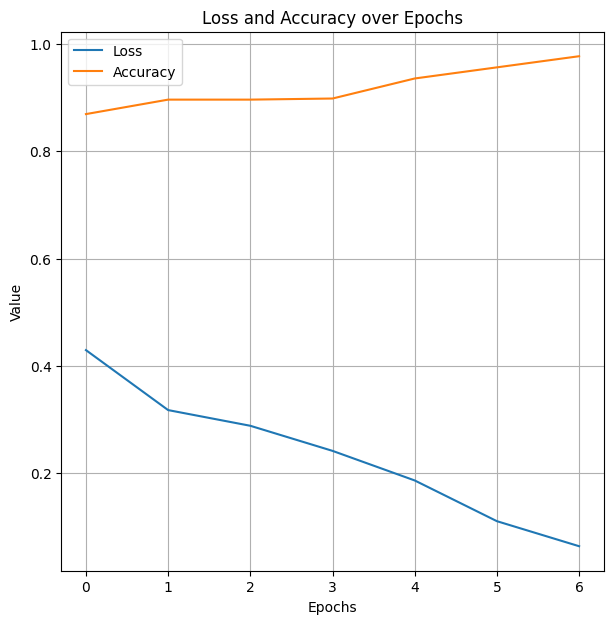

In [18]:
# Plotting loss and accuracy over 7 epochs
history = pd.DataFrame(hist.history)
plt.figure(figsize=(7,7))
plt.plot(history["loss"], label='Loss')
plt.plot(history["accuracy"], label='Accuracy')
plt.title("Loss and Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
#Testing the model, and retrieveing score and accuracy:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8658 - loss: 0.4233
score: 0.37
accuracy: 0.87


In [24]:
#now we validate for the models accuracy in predicting either a positive, or a negative score:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [25]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 99ms/step
1/1 - 0s - 96ms/step
1/1 - 0s - 98ms/step
1/1 - 0s - 109ms/step
1/1 - 0s - 98ms/step
1/1 - 0s - 109ms/step
1/1 - 0s - 97ms/step
1/1 - 0s - 92ms/step
1/1 - 0s - 63ms/step
1/1 - 0s - 80ms/step
1/1 - 0s - 79ms/step
1/1 - 0s - 70ms/step
1/1 - 0s - 66ms/step
1/1 - 0s - 112ms/step
1/1 - 0s - 84ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 61ms/step
1/1 - 0s - 63ms/step
1/1 - 0s - 62ms/step
1/1 - 0s - 61ms/step
1/1 - 0s - 77ms/step
1/1 - 0s - 67ms/step
1/1 - 0s - 57ms/step
1/1 - 0s - 56ms/step
1/1 - 0s - 63ms/step
1/1 - 0s - 69ms/step
1/1 - 0s - 61ms/step
1/1 - 0s - 72ms/step
1/1 - 0s - 61ms/step
1/1 - 0s - 57ms/step
1/1 - 0s - 64ms/step
1/1 - 0s - 57ms/step
1/1 - 0s - 69ms/step
1/1 - 0s - 68ms/step
1/1 - 0s - 53ms/step
1/1 - 0s - 55ms/step
1/1 - 0s - 62ms/step
1/1 - 0s - 58ms/step
1/1 - 0s - 61ms/step
1/1 - 0s - 71ms/step
1/1 - 0s - 55ms/step
1/1 - 0s - 50ms/step
1/1 - 0s - 64ms/step
1/1 - 0s - 54ms/step
1/1 - 0s - 52ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 49ms/step
1/1 - 0s -

In [26]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your customer service is the absolute worst i now have a mess of books on my kindle']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  51 510 674  12   2 895   1  69  11   6
   13  16  20   3   4]]
1/1 - 0s - 67ms/step
positive
